In [1]:
from ANEMO import ANEMO
from ANEMO.edfreader import read_edf
import pickle
%matplotlib inline

In [2]:
exp = {'px_per_deg': 27,
      'N_trials': 400,
      'N_blocks': 1,
      'list_events': ['StimulusOn\n', 'StimulusOff\n',
                      'TargetOn\n', 'TargetOff\n']}

In [3]:
def show(sujet, trial):
    
    if sujet < 13 : datafile = 'data/new_data/s%sBLa50.asc'%(sujet)
    else :          datafile = 'data/new_data/s%sBL50.asc'%(sujet)
    data = read_edf(datafile, 'Trialinfo')
    
    
    f = open('data/new_data/s%s_BL50_trials_errors.txt'%sujet, 'r')
    delete = f.read()
    delete = [[int(y) for y in x.split(' ')] for x in delete.split('\n') if x!='']
    list_trial = [delete[t][0]-1 for t in range(len(delete))]
    
    exp['dir_target'] = [[]]
    for t in range(len(list_trial)):
        if t not in list_trial : exp['dir_target'][0].append(None)
        else : exp['dir_target'][0].append([(abs(delete[x][1]-1)*2)-1 for x in range(len(list_trial)) if list_trial[x]==t][0])

    if [delete[t][2] for t in range(len(list_trial)) if list_trial[t]==trial][0] == 1 : print('Bad Trial')
    else : print('Good Trial')
    
    
    Plot = ANEMO.Plot(exp)
    Plot.plot_fit(data, trials=trial, show_num_trial=True, plot_detail=None);

    A = ANEMO(exp)
    arg = A.arg(data[trial], trial=trial, block=0)

    Fit = ANEMO.Fit(exp)
    result_fit = Fit.Fit_trial(A.velocity_NAN(**arg), **arg)
    print('chisqr', result_fit.chisqr)
    try :
        for i, n in enumerate(result_fit.var_names) :
            print(n, result_fit.covar[i][i])
    except :
        print('no covar')

# Good

Good Trial
block, trial =  0 11
chisqr 45434.213971179866
steady_state 0.058026858808131486
a_anti 14.242386113012449
latency 22.456883954090788
start_anti 44211.26303696501
tau 0.00022126014190568114


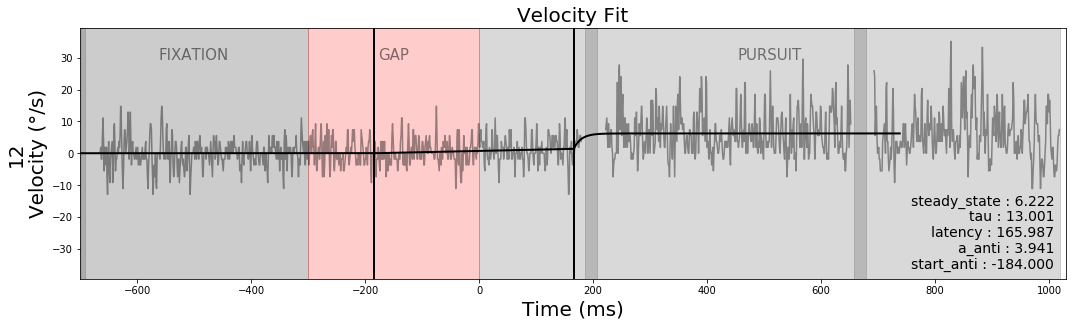

In [4]:
s, t = 1, 11
show(s, t)

Good Trial
block, trial =  0 11
chisqr 28520.93177558418
steady_state 0.054790679514001434
a_anti 0.17276395449070658
latency 36.68160397349069
start_anti 8.999298096877638e-06
tau 137.26974161712585


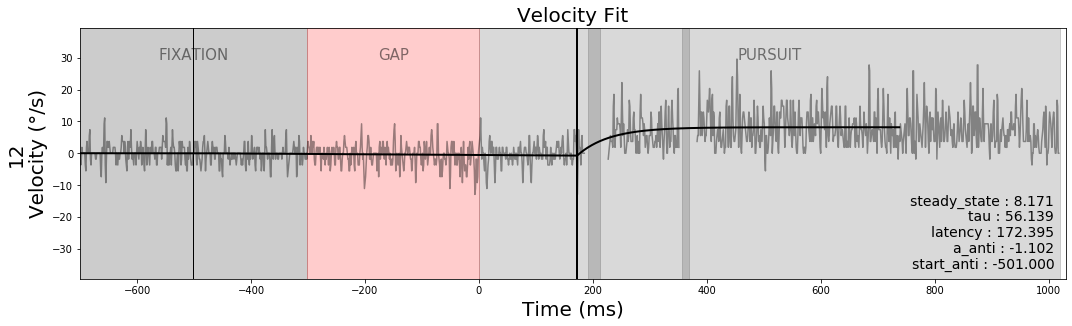

In [5]:
s, t = 2, 11
show(s, t)

Good Trial
block, trial =  0 11


/usr/local/lib/python3.6/dist-packages/lmfit/minimizer.py:789: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/usr/local/lib/python3.6/dist-packages/lmfit/minimizer.py:782: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


chisqr 75701.19831110233
steady_state 0.08175909163322603
a_anti -1785.751064449195
latency 49.552892255336054
start_anti -52917.24058187699
tau 188.87873076394868


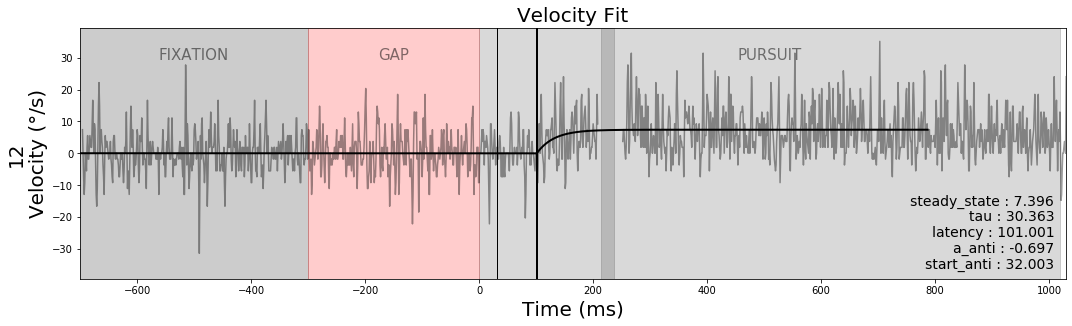

In [6]:
s, t = 3, 11
show(s, t)

Good Trial
block, trial =  0 11
chisqr 40561.935066295315
steady_state 0.06995889379255617
a_anti 7.489266495386135
latency 2871.8950787795784
start_anti 19904.52647170736
tau 4963.183678509506


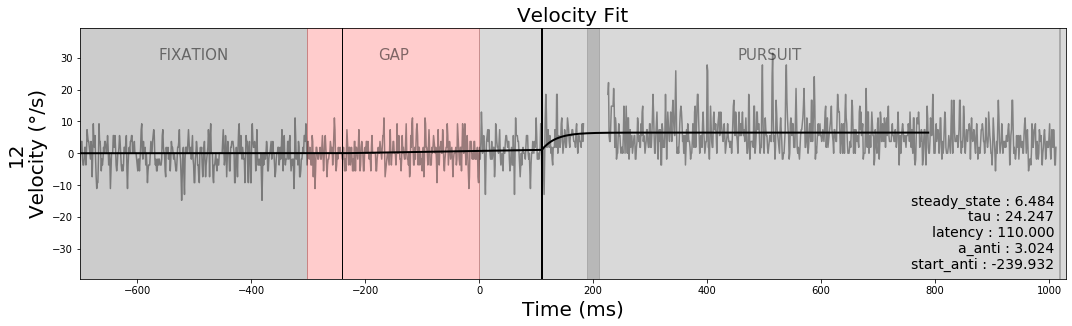

In [7]:
s, t = 4, 11
show(s, t)

# Bad

Bad Trial
block, trial =  0 392
chisqr 81324.37460095712
steady_state 0.12151980573292456
a_anti 29.12227627180102
latency 4.858108961116511e-07
start_anti 19216.28733043825
tau 9.272905898088225e-06


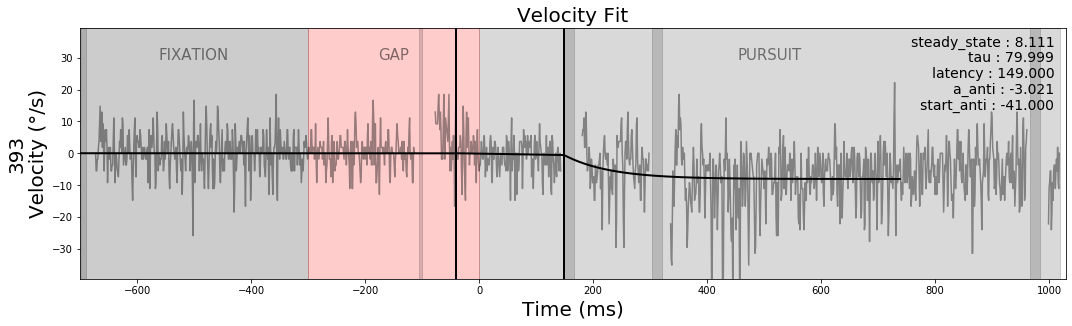

In [8]:
s, t = 1, 392
show(s, t)

Bad Trial
block, trial =  0 57
chisqr 31977.483786159086
steady_state 0.040126685625038565
a_anti 12.429172322338813
latency 53.82948654357262
start_anti 1704.963161129022
tau 2.6490535097177968e-05


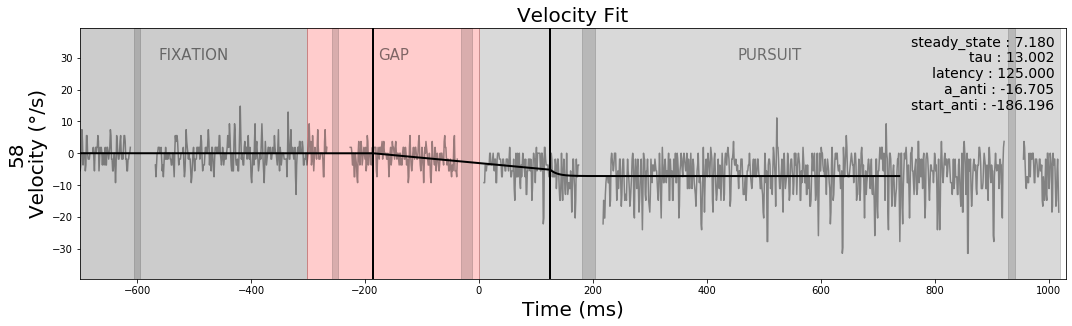

In [9]:
s, t = 2, 57
show(s, t)

Bad Trial
block, trial =  0 72


/usr/local/lib/python3.6/dist-packages/lmfit/minimizer.py:789: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/usr/local/lib/python3.6/dist-packages/lmfit/minimizer.py:782: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


chisqr 998123.6823136841
steady_state 1.4026367023021524
a_anti 778.3664613975669
latency -24921.71903680083
start_anti 6169.711774340336
tau 5357.179806474641


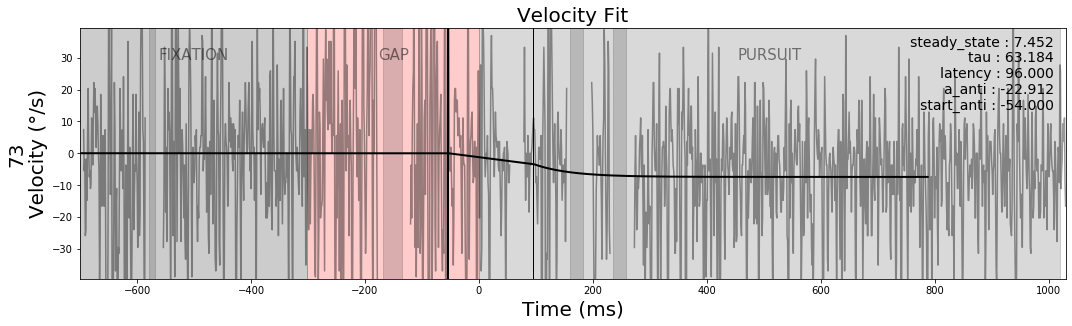

In [10]:
s, t = 3, 72
show(s, t)

Bad Trial
block, trial =  0 340
chisqr 51442.74505561195
steady_state 0.06987744440540943
a_anti 2600.1986416714576
latency 5752.916661341294
start_anti 10334.950114579618
tau 0.2180363884164702


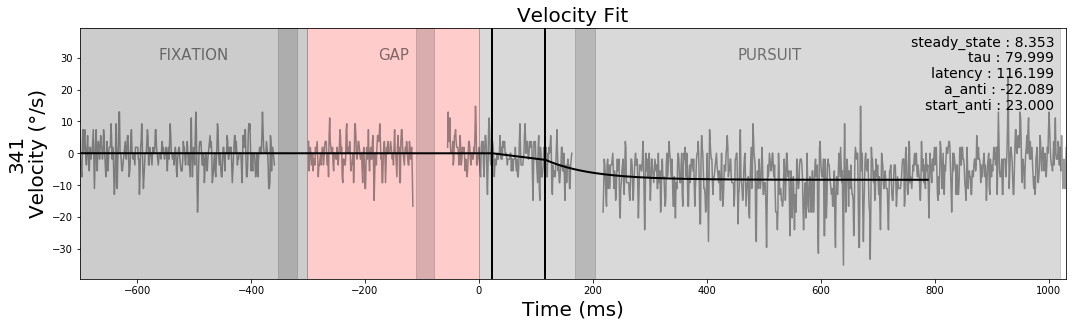

In [11]:
s, t = 4, 340
show(s, t)